<a href="https://colab.research.google.com/github/siddhantpadwal/Credit-Card-Fraud-Detection/blob/main/58_Creadit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the all required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


#Loading  credit card dataset

In [ ]:
dfcc=pd.read_csv('/content/drive/MyDrive/ML_dataset/creditcard_2023.csv')

In [ ]:
dfcc.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


checking the head of dataset that is 5 record

In [ ]:
dfcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

checking the datatypes of every columns in the dataset

In [ ]:
dfcc.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


for checking the decriptive statistics summary

In [ ]:
dfcc.shape

(568630, 31)

for checking the no.of columns and rows

In [ ]:
dfcc.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Checking the if there are null values in the dataset

In [ ]:
(dfcc.isnull().sum()/len(dfcc)*100)

id        0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

Checking the null values in percentage

#Data Balance or Imbalance

For checking that is that our dataset is balance or not.

In [ ]:
dfcc['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

This clearly shows that our data is balance as you can see both 1 and 0 having equal no.of records

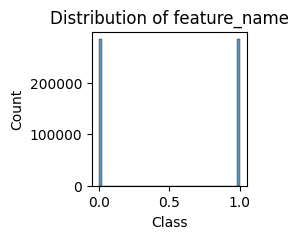

In [ ]:
plt.figure(figsize=(2,2))
sns.histplot(data=dfcc, x="Class")
plt.title('Distribution of feature_name')
plt.show()

Displaying the that the dataset is balance graphically

#Co-relation

In [ ]:
corr = dfcc.corr()


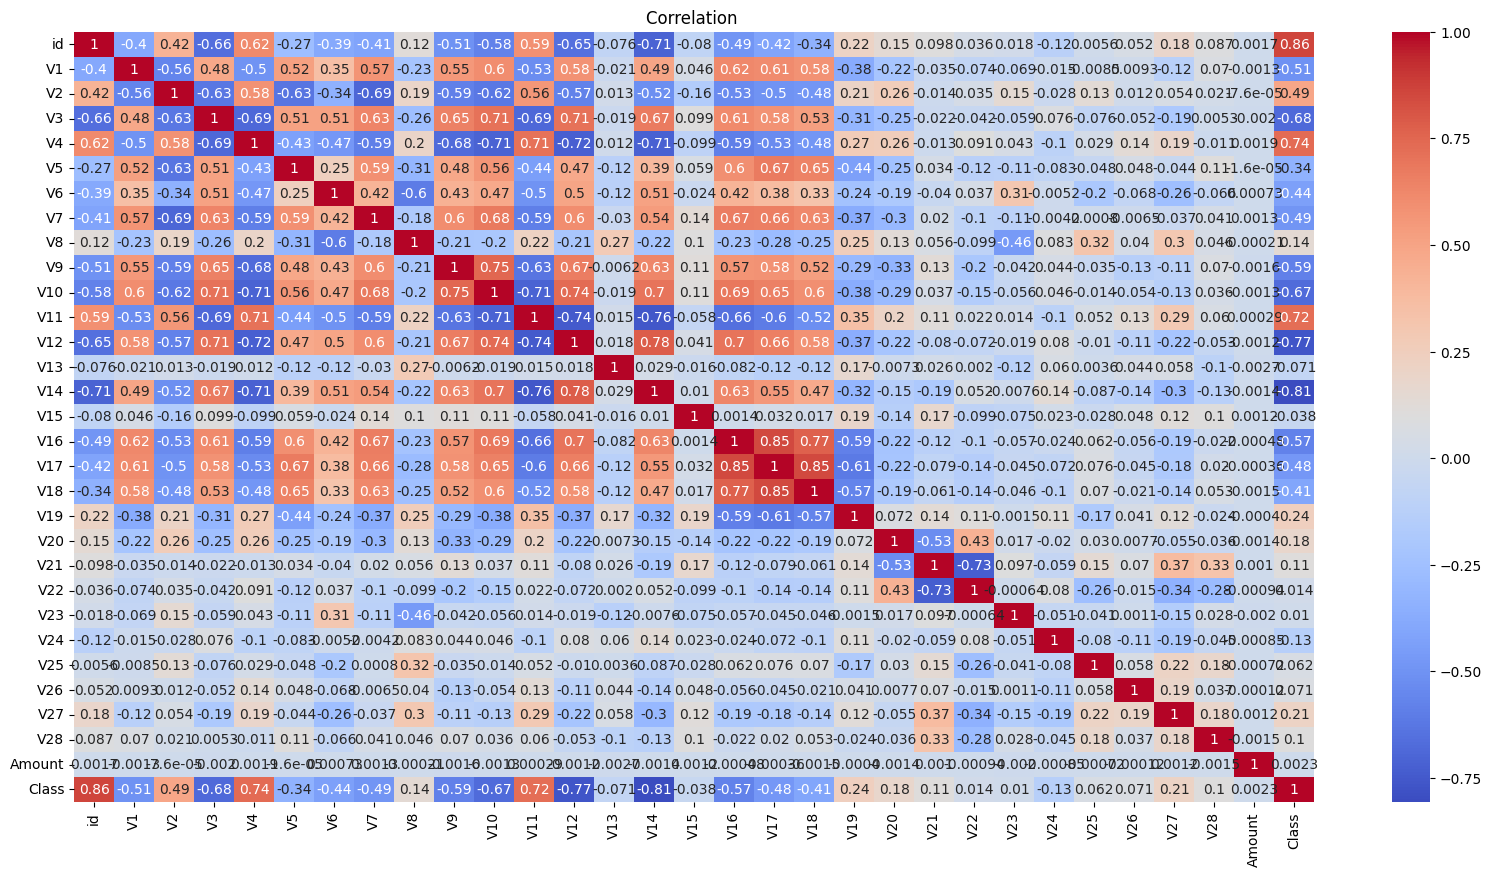

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation ')
plt.show()

Displaying the co-relation in dataset

#Feature Selection

##Now the checking for variables having co-relation having greater than 0.6

In [ ]:
abs_corr=corr.abs()
abs_corr

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,0.395741,0.424267,0.663655,0.617554,0.268445,0.387916,0.414288,0.121282,0.508427,...,0.097948,0.036106,0.017594,0.116685,0.005586,0.052126,0.184195,0.086822,0.001710,0.864283
V1,0.395741,1.000000,0.561184,0.484499,0.498963,0.517462,0.354728,0.573381,0.226757,0.548973,...,0.034669,0.073729,0.068917,0.014651,0.008508,0.009281,0.122772,0.070111,0.001280,0.505761
V2,0.424267,0.561184,1.000000,0.627810,0.579638,0.631669,0.341040,0.694022,0.191321,0.585095,...,0.013570,0.035346,0.151906,0.027515,0.132443,0.012219,0.053835,0.021071,0.000076,0.491878
V3,0.663655,0.484499,0.627810,1.000000,0.687726,0.510351,0.508974,0.634336,0.263018,0.648615,...,0.021710,0.041970,0.058884,0.076460,0.076332,0.052056,0.190582,0.005346,0.002001,0.682095
V4,0.617554,0.498963,0.579638,0.687726,1.000000,0.429243,0.474403,0.588648,0.199013,0.676648,...,0.013093,0.091197,0.043266,0.102508,0.029402,0.136679,0.188036,0.011316,0.001859,0.735981
V5,0.268445,0.517462,0.631669,0.510351,0.429243,1.000000,0.245187,0.586828,0.314975,0.479614,...,0.034147,0.119152,0.113919,0.083243,0.047845,0.047771,0.043759,0.108422,0.000016,0.338639
V6,0.387916,0.354728,0.341040,0.508974,0.474403,0.245187,1.000000,0.418703,0.604491,0.432241,...,0.040153,0.036896,0.308598,0.005237,0.195340,0.067605,0.260783,0.065641,0.000734,0.435088
V7,0.414288,0.573381,0.694022,0.634336,0.588648,0.586828,0.418703,1.000000,0.180986,0.601789,...,0.019627,0.104043,0.111177,0.004152,0.000802,0.006488,0.036557,0.040732,0.001326,0.491234
V8,0.121282,0.226757,0.191321,0.263018,0.199013,0.314975,0.604491,0.180986,1.000000,0.208557,...,0.056416,0.098752,0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,0.000208,0.144294
V9,0.508427,0.548973,0.585095,0.648615,0.676648,0.479614,0.432241,0.601789,0.208557,1.000000,...,0.131001,0.204723,0.042371,0.044006,0.034885,0.131000,0.111842,0.069959,0.001589,0.585522


In [ ]:
x=abs_corr[abs_corr['Class']>0.5].index
y=dfcc['Class']

Feature selection i.e
selecting the independent variable
selecting the dependent variable


Here,We are selecting the variable which are having co-realtion greater then 0.5

In [ ]:
x=dfcc.drop(['Class','id'],axis=1)


In [ ]:
y=dfcc['Class']

In [ ]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

#Spliting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Model Building

##1.LogisticRegression


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56724
           1       0.98      0.94      0.96     57002

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [ ]:
print(accuracy_score(y_test,y_pred))


0.9577493273306016


In LogisticRegression getting the accuracy score is 95.77%

##2.Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
cl=DecisionTreeClassifier(criterion='entropy',random_state=0)
cl.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred1=cl.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred1))

0.9996658635668185


In DecisionTreeClassifier alogorithm accuracy score is 99%

##3.KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred2=knn.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred2)
cm

array([[56713,    11],
       [   93, 56909]])

In [ ]:
accuracy_score(y_test,y_pred2)

0.9990855213407664

In  KNeighborsClassifier algorithm accuracy score getting is 99.90%

##4.RandomForestClassifier




In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, criterion='entropy')
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
y_pred3 = model.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
print(accuracy_score(y_test,y_pred3))

0.9998593109755025


In RandomForestClassifier having getting accuracy score is 99%

#Deep Learning

# Importing required libraries for deep learning

In [ ]:
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
%matplotlib inline

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## ANN Model

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
X_train1, X_test1, y_train1, y_test1 = train_test_split(dfcc.drop('Class', axis=1), dfcc['Class'], test_size=0.2, random_state=42)
model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train1, y_train1, epochs=3)
model.evaluate(X_test1, y_test1)

Epoch 1/3
14216/14216 [==============================] - 48s 3ms/step - loss: 65.6514 - accuracy: 0.8230
Epoch 2/3
14216/14216 [==============================] - 30s 2ms/step - loss: 4.2435 - accuracy: 0.9266
Epoch 3/3
3554/3554 [==============================] - 6s 2ms/step - loss: 0.0277 - accuracy: 0.9918


[0.02773101069033146, 0.9918224215507507]

By using Ann the accuracy score =99.18%

## RNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Assuming your input is a sequence of 30 timesteps, each with one feature.
lstm = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(30, 1), return_sequences=True),
    keras.layers.LSTM(25),
    keras.layers.Dense(1, activation='sigmoid')
])

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm.fit(X_train1, y_train1, epochs=10, batch_size=1000)

Epoch 1/10
455/455 [==============================] - 109s 230ms/step - loss: 0.2411 - accuracy: 0.9095
Epoch 2/10
455/455 [==============================] - 106s 234ms/step - loss: 0.1297 - accuracy: 0.9532
Epoch 3/10
455/455 [==============================] - 106s 233ms/step - loss: 0.0975 - accuracy: 0.9643
Epoch 4/10
455/455 [==============================] - 106s 233ms/step - loss: 0.0745 - accuracy: 0.9733
Epoch 5/10
455/455 [==============================] - 103s 227ms/step - loss: 0.0591 - accuracy: 0.9797
Epoch 6/10
455/455 [==============================] - 121s 266ms/step - loss: 0.0495 - accuracy: 0.9829
Epoch 7/10
455/455 [==============================] - 129s 284ms/step - loss: 0.0382 - accuracy: 0.9864
Epoch 8/10
455/455 [==============================] - 125s 274ms/step - loss: 0.0311 - accuracy: 0.9891
Epoch 9/10
455/455 [==============================] - 126s 276ms/step - loss: 0.0309 - accuracy: 0.9890
Epoch 10/10
455/455 [==============================] - 133s 293m

By using RNN model getting the accuracy score is 99.20%

 we have used variety of models to find the accuracy where we chose data which have correlation greater then 0.5.

```
# Machine Learning
 1. Logistic regression - 95.77 %
 2. Decision tree - 99.96 %
 3. k nearest neighbor - 99.90 %
 4. RandomForest - 99.98 %
```

```

 #Depp Learning
 1. ANN Model- 99.18%
 2. RNN Model-99.20%
 ```



#Now the checking for variables having co-relation having greater than 0.3

#Feature Selection

In [ ]:
x2=abs_corr[abs_corr['Class'] > 0.3].index


In [ ]:
x2

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'Class'],
      dtype='object')

In [ ]:
x2=dfcc.drop(['Class','id'],axis=1)
x2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


In [ ]:
y2=dfcc['Class']

In [ ]:
y2

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

### Spliting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.2,random_state=0)

###1.LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train2,y_train2)

LogisticRegression()

In [ ]:
y_predlgr = lgr.predict(x_test2)
y_predlgr

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
print(accuracy_score(y_test2,y_predlgr))

0.9577493273306016


In LogisticRegression for co-relation greater then 0.3 .
The accuracy score is 95.77%

In [ ]:
cm2 = confusion_matrix(y_test2,y_predlgr)
cm2

array([[55587,  1137],
       [ 3668, 53334]])

In [ ]:
print(classification_report(y_test2,y_predlgr))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56724
           1       0.98      0.94      0.96     57002

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



###2.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(x_train2,y_train2)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_preddt = dt.predict(x_test2)
y_preddt

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
print(accuracy_score(y_test2,y_preddt))

0.9985579374989009


In DecisionTreeClassifier for co-relation greater then 0.3 .
The accuracy score is 99.98%

In [ ]:
cmdt = confusion_matrix(y_test2,y_preddt)
cmdt

array([[56600,   124],
       [   40, 56962]])

In [ ]:
print(classification_report(y_test2,y_preddt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



###3.KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train2,y_train2)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predknn=knn.predict(x_test2)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cmknn=confusion_matrix(y_test2,y_predknn)
cmknn

array([[54225,  2499],
       [ 5268, 51734]])

In [ ]:
accuracy_score(y_test2,y_predknn)

0.9317042716705063

###4.RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, criterion='entropy')
model.fit(x_train2,y_train2)

RandomForestClassifier(criterion='entropy')

In [ ]:
y_predrt = model.predict(x_test2)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_predrt,y_test2)
print(classification_report(y_test2, y_predrt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
print(accuracy_score(y_test2,y_predrt))

0.9998593109755025


 we have used 4 models to find the accuracy where we chose data which have correlation greater then 0.3.

```
# Machine Learning
 1. Logistic regression - 95.77 %
 2. Decision tree - 99.85 %
 3. k nearest neighbor - 93.17 %
 4. RandomForest - 99.98 %
```

```

 #Depp Learning
 1. ANN Model- 99.18%
 2. RNN Model-99.20%
 ```




#Conclusion:

The dataset contains 568,630 records of credit card transactions, with 31 features, including id, Amount, Class, and 28 anonymized variables (V1 to V28).

The dataset is balanced, meaning that there are equal numbers of fraudulent and non-fraudulent transactions having 284,315 each.And dataset has no missing values or invalid data types.

We are spliting into training and testing sets, with 80% of the data for training and 20% for testing.

Conculsion based on all the Machine leanrnig & Deep learnig models, we have used the for every 100 client model will predict accurate result for 99 clients i.e client have done fraudlat transaction or not .

Random Forest =99.98% and RNN model=99.20% have the highest accuracy score, and suggests that they are the most suitable models for  this dataseet of detecting credit card fraud.

After Building all Model we can say that
deep learning model are more accurate then the machine learnig models.